<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Random variables and probability distributions

Week 3 | Lesson 1.1

---


### Sections

- [Random Variables](#random_variables)
- [Discrete Uniform Distribution](#discrete_uniform)
- [Cumulative Distribution Function](#cumulative_distribution)
- [Bernoulli Distribution](#bernoulli)
- [Binomial Distribution](#binomial)
- [Geometric Distribution](#geometric)
- [Negative Binomial Distribution](#negative_binomial)
- [Hypergeometric Distribution](#hypergeometric)
- [Poisson Distribution](#poisson)
- [Exponential Distribution](#exponential)
- [Normal Distribution](#normal)


<a id='random_variables'></a>

## Random variables

---

Random Variables are quantities that can take on values and have associated probabilities with taking on those values.

The canonical example is a coin flip, where the outcome is a random variable that can take on a value of 1 or 0, each with a probability of 0.5.

Random variables can be divided into two categories:


### Discrete random variables

Discrete random variables have outcomes which are "countable". The number of heads in a series of coin flips, for example, or the number of aces drawn in a series of hands from a deck of cards. Each discrete outcome has an associated probability of occuring.

For discrete random variables, the distribution of the probabilities of each outcome is called the **probability mass function (pmf)**. 


### Continuous random variables

Continuous random variables, on the other hand, have outcomes which are not countable. Say, for example, $T$ is a random variable representing the temperature at noon. There are not exact temperature outcomes with associated probabilities of occurance – the number of outcomes is infinite. The probabilities of _ranges of values_ are calculated as areas under the **probability density function (pdf)**, which is the probability function associated with continuous variables.



In [5]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='discrete_uniform'></a>

## The discrete uniform distribution: rolling a die

---

Imagine we are rolling a fair die. The outcome of rolling the die is represented by a random variable $X$, which can take on values 1 through 6. $X$ is a discrete random variable.

The probability mass function $f$ over the six possible outcomes $k$, each with an associated probability $p$, is defined as:

$$  \text{pmf} = f(k; p) =
    \begin{cases}
    0.1\overline{66} & \text{for }k=1 \\ 
    0.1\overline{66} & \text{for }k=2 \\
    0.1\overline{66} & \text{for }k=3 \\
    0.1\overline{66} & \text{for }k=4 \\
    0.1\overline{66} & \text{for }k=5 \\
    0.1\overline{66} & \text{for }k=6
    \end{cases}
$$

This is an example of the **discrete uniform distribution** because all of the outcomes have the same probability. If you plot the probability mass function, you can see that the probability histogram is uniform.

In [6]:
die =stats.randint(1, 7)
die.pmf(3)

0.16666666666666666

In [65]:
def plot_discrete_pmf(low, high, title='Title', dist=None):
    x = np.arange(low, high+1)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel('Outcome', fontsize=16)
    ax.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
    ax.vlines(x, 0, dist.pmf(x), colors='darkred', lw=8, alpha=0.8)
    ax.set_ylim(0, np.max(dist.pmf(x))+0.03)
    
    plt.title(title+'\n', fontsize=20)
    plt.show()

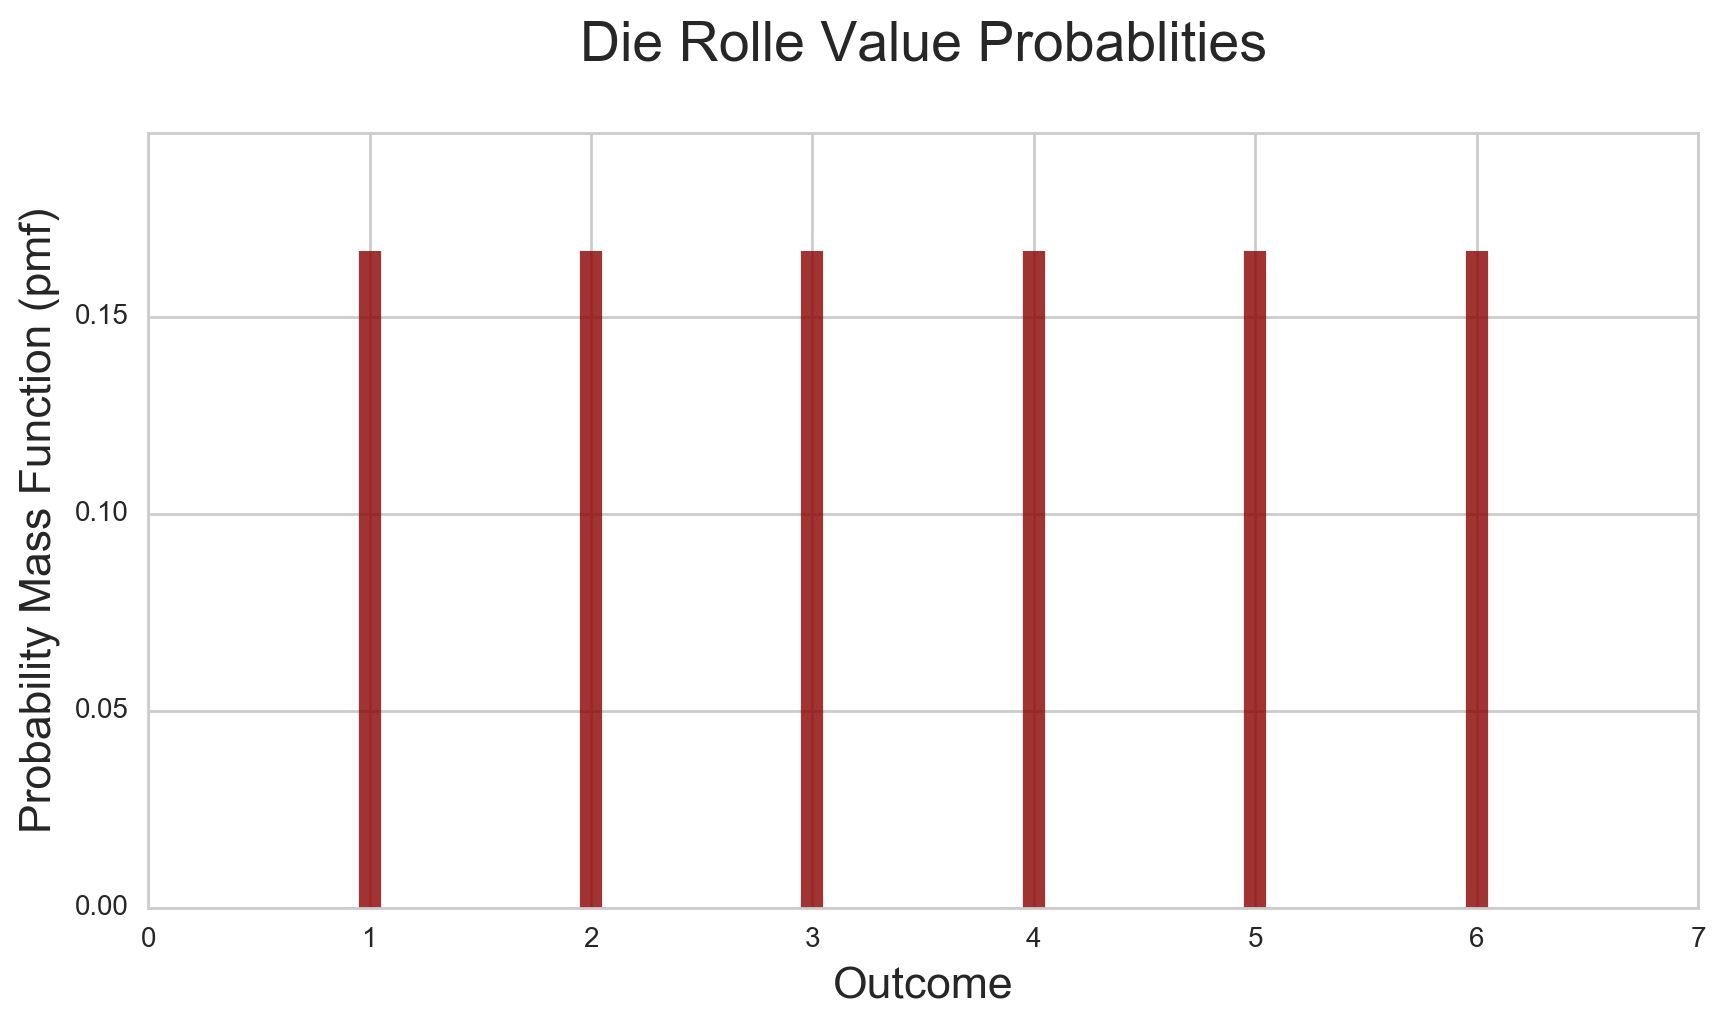

In [66]:
plot_discrete_pmf(1,6, title = "Die Rolle Value Probablities", dist = die)

<a id='cumulative_distribution'></a>

## The cumulative distribution function (CDF)

---

Continuing with the die example, we can also plot out the cumulative probability of our six ourcomes. This is known as the **cumulative distribution function** and is simply the cumulative sum of the probability mass or density function for a random variable.

Each point on a cumulative distribution funciton represents the probability that a random variable is less than or equal to that value.

In [69]:
die.cdf([0,1,2,3,4,5])

 
def plot_discrete_cdf(low, high, title='Title', dist=None):
    x = np.linspace(low-0.25, high+0.25, 300)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel('Outcome', fontsize=16)
    ax.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
    #ax.vlines(x, 0, dist.cdf(x), colors='darkred', lw=8, alpha=0.8)
    ax.plot(x, dist.cdf(x), color='steelblue', lw=4)
    
    plt.title(title+'\n', fontsize=20)
    plt.show()

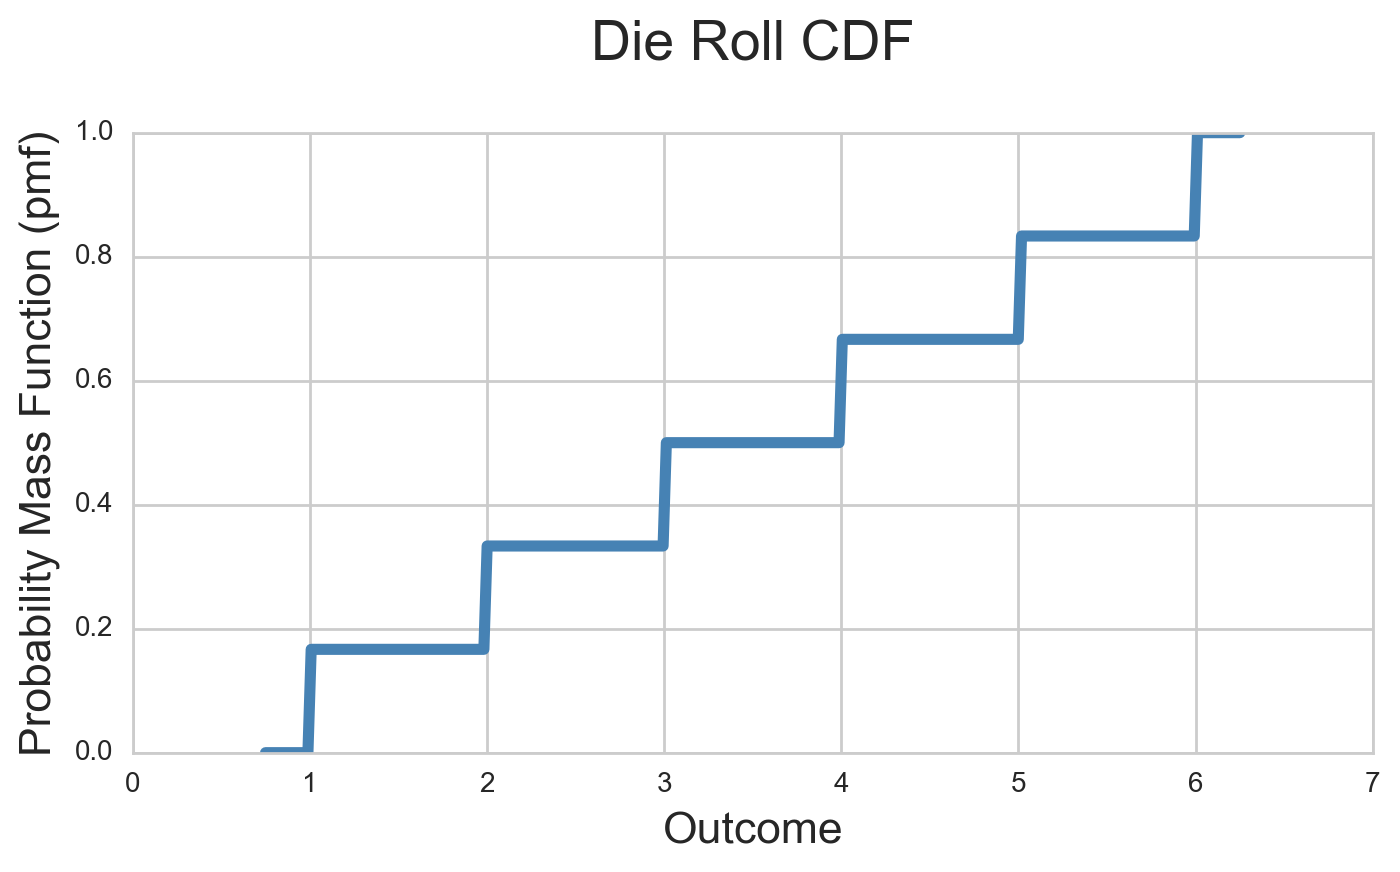

In [70]:
plot_discrete_cdf(1,6, "Die Roll CDF", dist=die)

AttributeError: 'str' object has no attribute 'pmf'

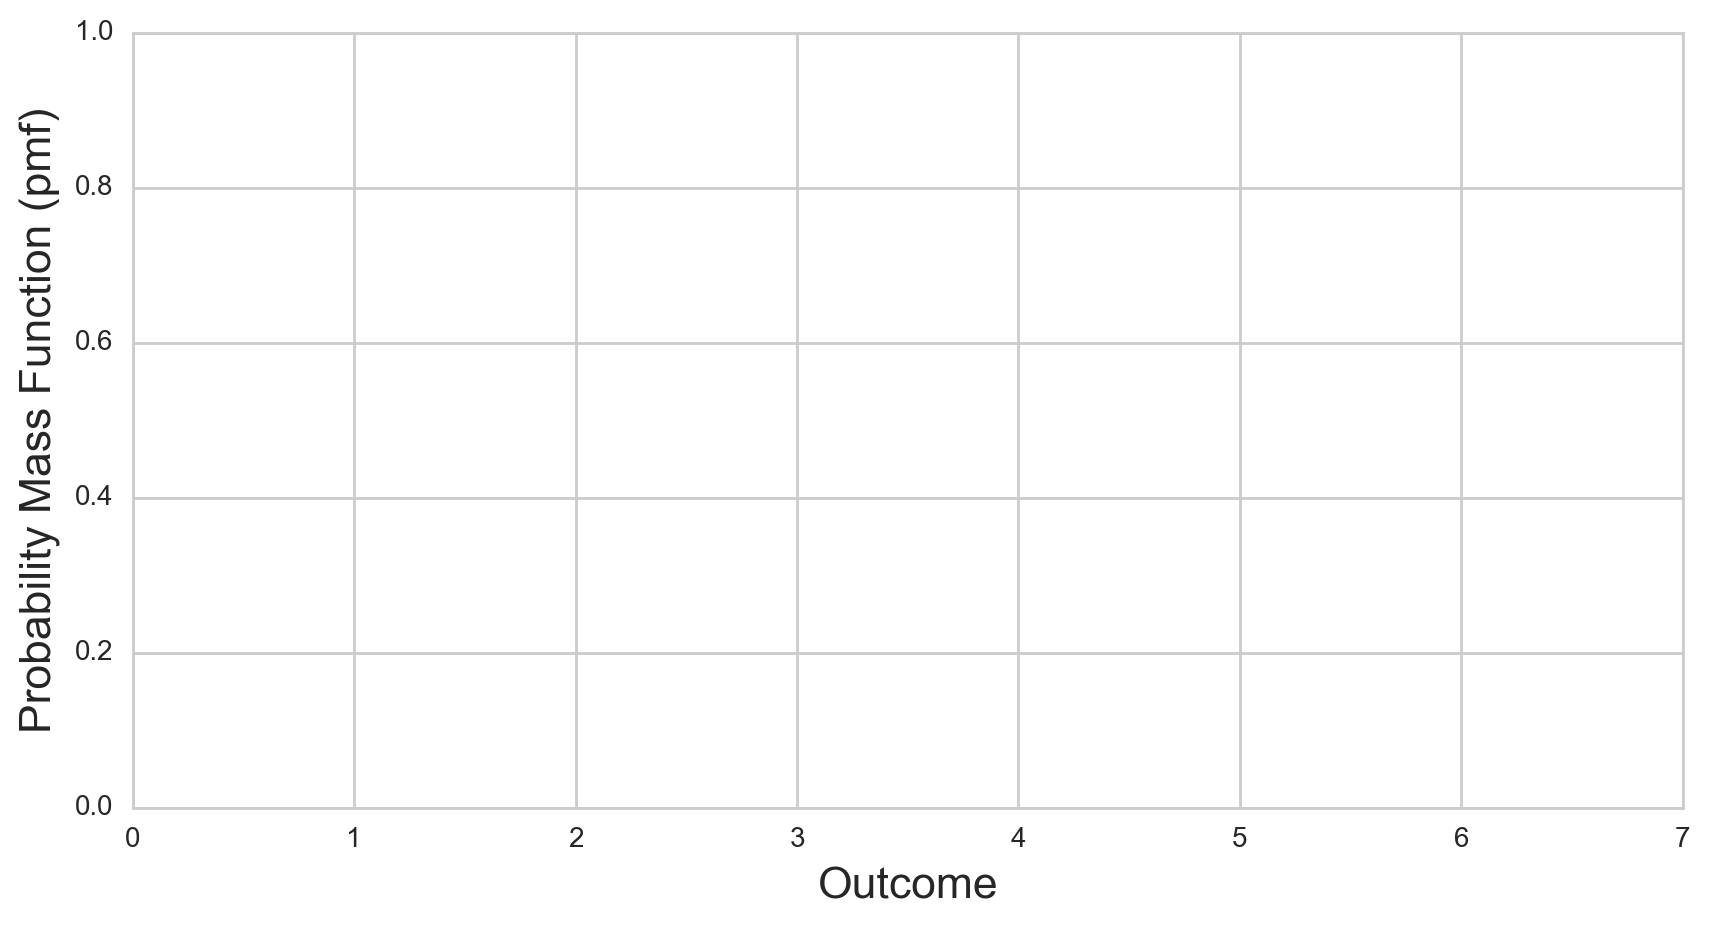

In [54]:
norm_dist = stats.norm(3,1)


    
plot_discrete_pmf(1,6, norm_dist, ' Normal "PMF"')

<a id='bernoulli'></a>

## The Bernoulli distribution

---

When your outcome is binary, typically denoted with 0 and 1 outcome values, this is a "Bernoulli" distributed random variable. 

Some common examples of a Bernoulli random variable:

- A coin flip.
- Whether or not it will rain tomorrow.
- Whether a user will buy your product after visiting your website.

That last example, and Bernoulli distributed variables in general, will continually appear throughout the course, especially in the contexts of classification and split testing.

#### Bernoulli pmf

The probability mass function $f$ for outcomes $k$ and probabilities $p$ is:

### $$  pmf(k; p) =
    \begin{cases}
    p & \text{for }k=1 \\
    q=(1-p) & \text{for }k=0 \\ 
    \end{cases}
$$

Below is a pdf where $p = 0.25$, an unfair coin-flip.

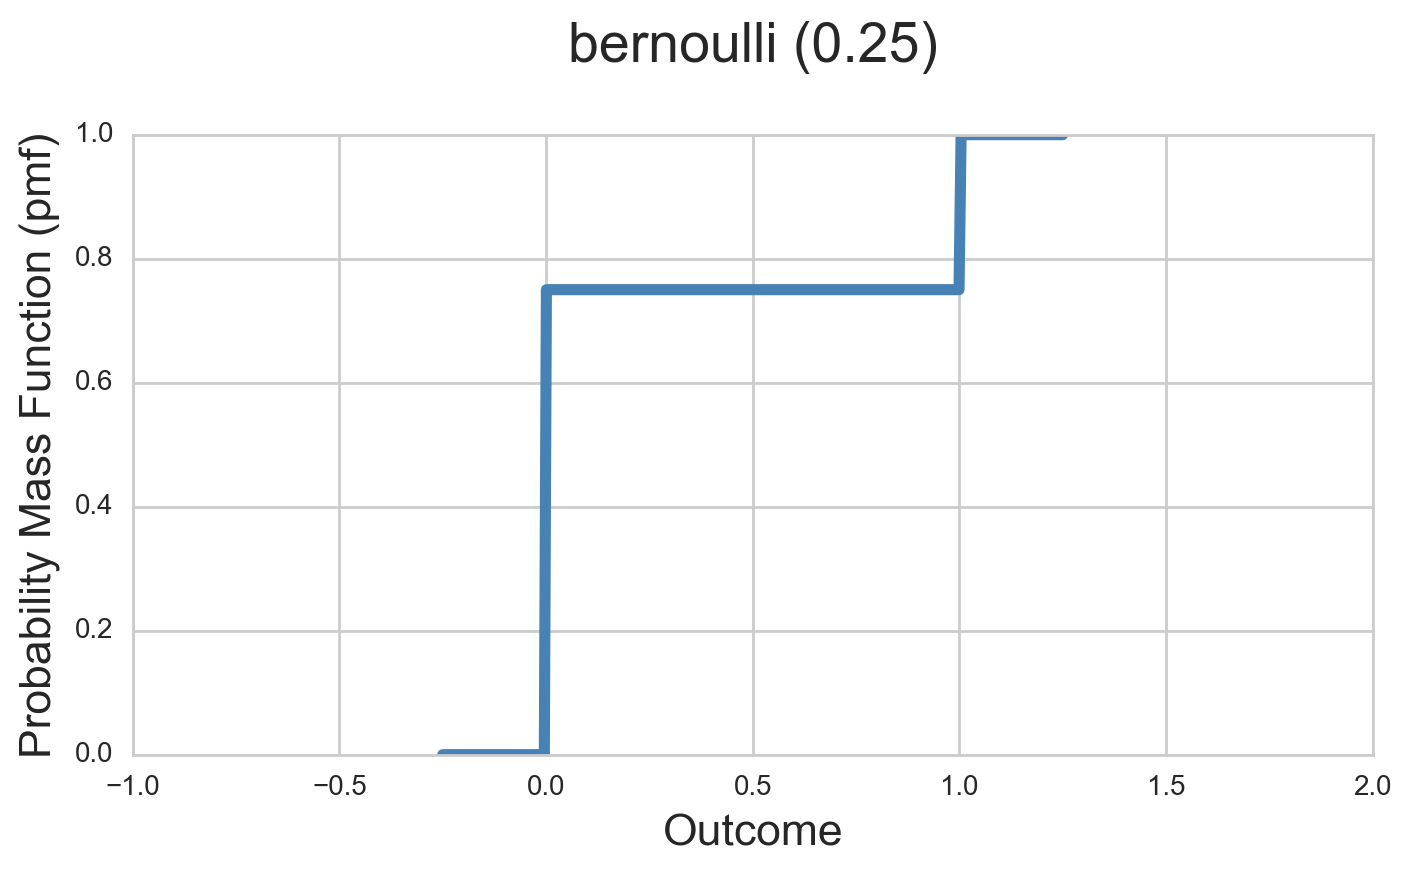

In [71]:
plot_discrete_cdf(0, 1, "bernoulli (0.25)", stats.bernoulli(0.25))

#### Bernoulli CDF

It's cumulative distribution function is also defined as a function of $k$ outcomes with $p$ probabilities:

### $$ cdf(k; p) =
\begin{cases}
    0 & \text{for }k<0 \\ 1 - p & \text{for }0\leq k<1 \\ 1 & \text{for }k\geq 1
\end{cases} $$

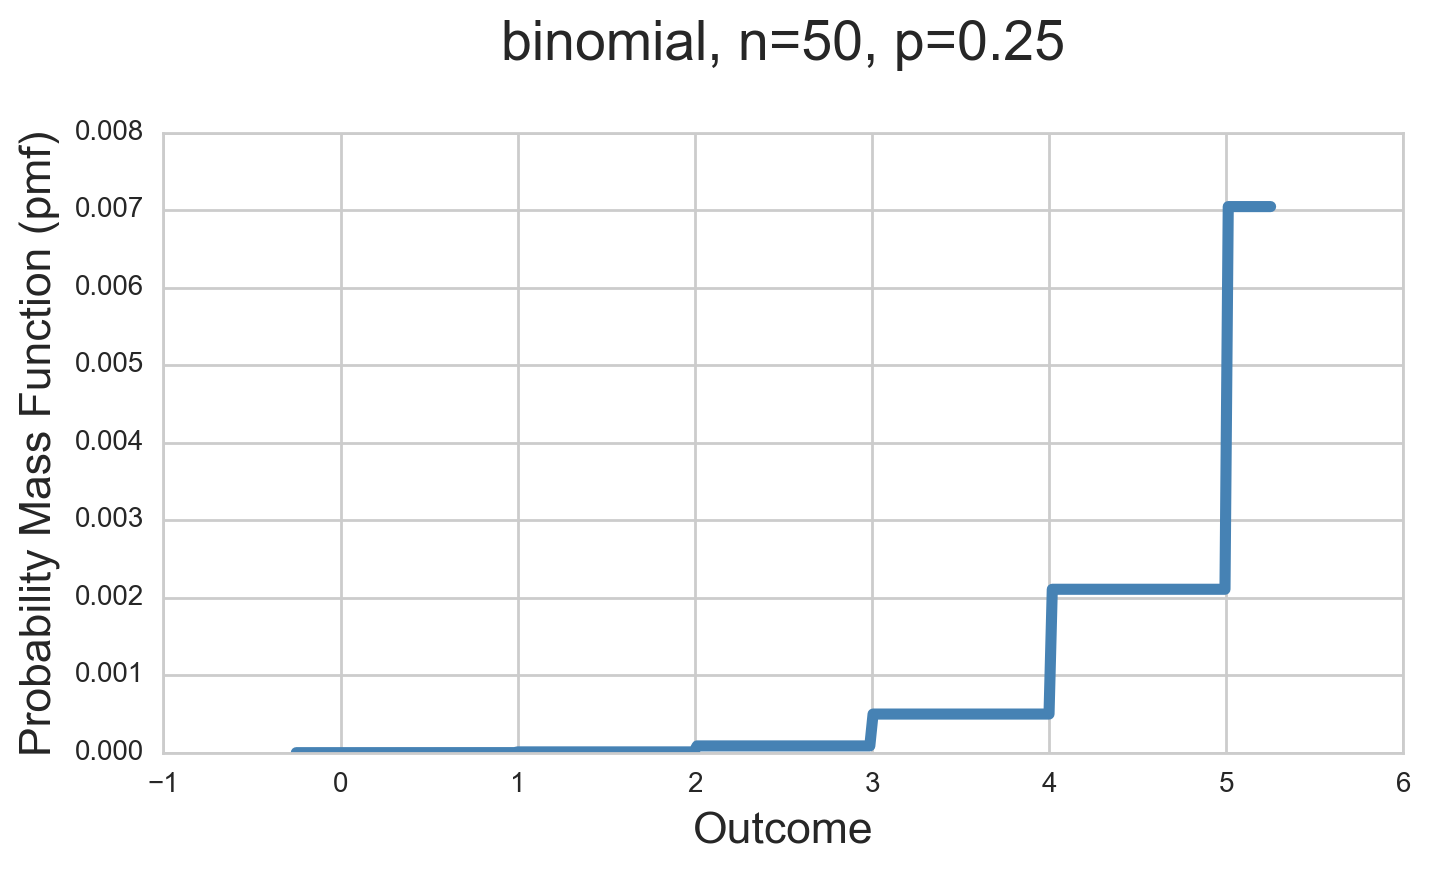

In [72]:
plot_discrete_cdf(0,5,"binomial, n=50, p=0.25",stats.binom(50, 0.25))

<a id='bernoulli'></a>

## The Binomial distribution

---

The binomial distribution is directly related to the Bernoullli distribution: it is **the sum of positive outcomes of a Bernoulli distributed random variable.**

Whereas the Bernoulli distribution represents a single binary outcome and it's probability of occuring, the binomial has a parameter $n$ for the number of "trials".

It is important to note that each trial, or event, must is independent and have the same probability of success to be represented with the binomial distribution. 

#### Binomial pmf

The pmf is a function of $n$ trials with $p$ probability of success and $k$ successes in those trials:

### $$ pmf(k;n,p) = P(X = k) = \binom n k  p^k(1-p)^{n-k} $$

Which describes the probability that there will be $k$ successes in $n$ trials.

Below is the binomial pmf for 50 coin flips of a coin with probability of getting heads at 25%.


#### Binomial cdf

The cumulative distribution function for the binomial distribution is

### $$ cdf(k;n,p) = P(X \le k) = \sum_{i=0}^{\lfloor k \rfloor} {n\choose i}p^i(1-p)^{n-i} $$

(Where $\lfloor k \rfloor$ is the greatest integer less than or equal to $k$ – this ensures that the cdf can still be represented continuously).

<a id='geometric'></a>

## The Geometric distribution

---

Whereas the Binomial distribution asks how many $k$ successes occur in $n$ trials, the Geometric distribution asks **how many "failure" trials occur prior to the first "success" trial?**

So, in the canonical coin flip example, how may times do we flip the coin and get tails before we get the first heads (given a probability of heads $p$)?

Note a couple of things:

1. These are Bernoulli trials with a probability of success $p$, just like in the Binomial.
2. The trials are independent. This means that if we were drawing cards to get a king, for example, the geometric distribution would measure the trials until we get a king _with replacement_, meaning we put the card back in each time and shuffle.

#### Geometric pmf

The probability mass function is calculated as:

### $$ pdf(k; p) = (1 - p)^{k}\,p $$

Where $k$ is the number of trials and $p$ is the probability of success on each trial.

Let's take the example of drawing cards until we get a king (with replacement!). The probability of getting a king is 4/52. The geometric pdf looks like this:

#### Geometric cdf

Likewise, the cumulative distribution function is:

### $$ cdf(k; p) = 1 - (1 - p)^{k+1} $$

<a id='negative_binomial'></a>

## The Negative Binomial distribution

---

The Negative Binomial distribution is a generalization of the Geometric distribution. Where the Geometric distribution represents the number of trials until the first success, **the Negative Binomial represents the number of trials until the first $r$ successes.**

The Geometric is thus a special case of the Negative Binomial, where $r = 1$. 

#### Negative Binomial pmf

### $$ pmf(k; r, p) = P(X = k) = \binom{k+r-1}{k} p^k(1-p)^r $$

Where $k$ is the number of failures, $r$ is the number of successes, and $p$ is the rate

For example, say we have a website. We want to measure the number of visitors that will come to the website before 3 of those visitors purchase our product. We know that the probability $p$ of any one visitor purchasing our product is 0.05.


#### Negative Binomial cdf

[The cumulative distribution function is more complex, using a beta function.](https://en.wikipedia.org/wiki/Negative_binomial_distribution) I won't cover it now, but we can still plot the cumulative distribution using the plotting function we wrote.

<a id='hypergeometric'></a>

## The Hypergeometric distribution

---

The Hypergeometric distribution is directly related to the Binomial and Bernoulli. Imagine you are selecting cards from a deck of hands. What is the probability that you will draw a heart from the deck of cards each time you draw, without putting the cards back in?

The Binomial distribution would model the probability of drawing a heart when you are selecting the cards _with replacement._

The Hypergeometric, on the other hand, models the probability of drawing a heart _without replacement._ This distribution is appropriate any time events are done without replacement.

#### Hypergeometric pmf

The Hypergeometric pmf is

### $$  P(X = k) = \frac{\binom{K}{k} \binom{N - K}{n-k}}{\binom{N}{n}} $$

Where $N$ is the total size of the "population" (52 cards),

$K$ is the total number of possible "successes" (13 hearts),

$n$ is the number of trials, or draws,

$k$ is the number of successes in those draws

The pmf across 20 draws looks like:

#### Hypergeometric cdf

[The cumulative distribution function for the hypergeometric is complicated.](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

We can plot out what it looks like for our scenario drawing 20 cards:

<a id='poisson'></a>

## The Poisson distribution

---

The Poisson distribution represents the counts of "positive" events, or successes, within a time span. It shares a relationship with Bernoulli random variables and the Binomial distribution. 

A Bernoulli random variable represents the probability that an event will occur during a "trial". Imagine we had a Bernoulli random variable that was the probability of a user visiting our site between 12pm and 1pm. If we change this to be between 12pm and 12:15pm, this remains a Bernoulli random variable but the probability has decreased. As the time frame shrinks, the probability shrinks as well.

The Poisson distribution represents infinitely many infinitely small probability trials. $n$ increases to infinity and $p$ shrinks towards zero such that $np$ remains the same. The Poisson distribution is the Binomial distribution taken to the limit.

#### Poisson pmf

### $$P(k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

Where $k$ is the number of events that occur in an interval,

and $\lambda$ is the rate at which events occur.

Let's say, for example, we are measuring visitors to our website. What is the probability mass function of the Poisson distribution for visitor counts given we have an average rate of 25 visitors per hour?

What if the rate was 5 instead?

#### Poisson cdf

The cumulative distribution is given by the formula:

### $$ e^{-\lambda} \sum_{i=0}^{\lfloor k\rfloor} \frac{\lambda^i}{i!} $$

Where again, the $\lfloor k\rfloor$ represents the greatest integer less than or equal to $k$.

<a id='exponential'></a>

## The Exponential distribution

---

What if we were interested in how long until something happens, rather than how many events occur within a timeframe? **The Exponential Distribution models the amount of time until an event occurs.**

Recall that the Poisson distribution is the Binomial distribution taken to the limit where the event times are infinitesimally small ($p$ of an event goes to zero) but there are infinitely many events ($n$ goes to infinity). Likewise, the Exponential is the Geometric distribution taken to the same limits.

Where the Geometric distribution measures the _number of events until a success_, the Exponential measures the _time until a success_.

This is the first instance of a continuous distribution, since time is a continuous measure.

#### Exponential pdf

The Exponential pdf is defined as:

### $$ pdf(\lambda; t) = \lambda  e^{-\lambda t} $$

Where $\lambda$ is the rate of event occurences,

and $t$ is the time elapsed.

Returning to the website example, we could ask: given a rate of 10 visitors per hour, how long from now will we expect the next visitor to arrive?

#### Exponential cdf

The cumulative distribution function is:

### $$ cdf(\lambda; t) = 1 -  e^{-\lambda t} $$

With the same example, our cumulative distribution function looks like:

<a id='normal'></a>

## The Normal distribution

---

The Normal distribution is the most well known, and most important distribution. The normal distribution models the sum of random variables from _any_ distribution. This is the Central Limit Theorem, which we will discuss more in a later lecture. 

For example, the sum of a series of Bernoulli trials will be normally distributed the more trials are summed. If this is confusing, it is important to remember that the Normal distribution is a random variable _representing the probabilities of outcomes from summing the Bernoulli trials._ It is modelling the possible sums.

There are some caveats to the idea that the sum of random variables will be normally distributed, but it holds true in most cases. Because of the Central Limit Theorem, the normal distribution appears all over the place.


#### Normal pdf

The probability density function of the Normal distribution is given by

### $$ pdf(x \; | \; \mu, \sigma^2) = \frac{1}{\sqrt{2\sigma^2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

Where $\mu$ is the mean of the distribution,

and $\sigma^2$ is the variance of the distribution.

Thus a Normal distribution is parameterized by it's mean and variance.

Let's return to a Poisson variable example. Say we are measuring the number of users that come to our site. The rate of visitors to our site is 25 per hour. We measure the number of visitors that come to our site on 500 different hours:


If we plot the visitor count histogram for the 500 different hour measurements, we can see that it is normally distributed.

#### Normal cdf

[The Normal cumulative distribution function has to be approximated.](https://en.wikipedia.org/wiki/Normal_distribution#Definition) See the wikipedia page for the details on how it is calculated. 

We can plot it here, however, using the scipy module.